# Pytorch
- This notebook used torch==2.5.1 torchvision==0.20.1
- PyTorch is an open-source deep learning framework developed by Facebook. 
- It provides a flexible and efficient way to work with tensors and build neural networks.
- PyTorch is widely used for tasks like computer vision, natural language processing, and reinforcement learning due to its dynamic computation graph and ease of debugging.

## PyTorch Basics: Tensors
Tensors are the basic building blocks in PyTorch, similar to NumPy arrays, but they also support GPU acceleration.

Example: Creating and manipulating tensors

In [2]:
import torch

# Create a tensor
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("Tensor x:\n", x)

# Perform operations
y = x + 5
print("\nTensor y  (x + 5):\n", y)

# Element-wise multiplication
z = x * y
print("\nTensor z (x * y):\n", z)

# Check GPU availability
if torch.cuda.is_available():
    x = x.to('cuda')  # Move tensor to GPU
    print("\nTensor x moved to GPU")


Tensor x:
 tensor([[1., 2.],
        [3., 4.]])

Tensor y (x + 5):
 tensor([[6., 7.],
        [8., 9.]])

Tensor z (x * y):
 tensor([[ 6., 14.],
        [24., 36.]])


##  PyTorch for Linear Regression
PyTorch is often used to build and train models. Here's an example of linear regression.

Example: Simple Linear Regression

In [5]:
import torch
import torch.nn as nn

# Generate dummy data
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Define a simple linear regression model
model = nn.Linear(1, 1)  # One input feature, one output feature

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

# Print the learned weights and bias
print("\nLearned parameters:")
print("Weight:", model.weight.item())
print("Bias:", model.bias.item())

# Dummy data for predictions
dummy_data = torch.tensor([[5.0], [6.0], [7.0]])  # Example: Predict for 5, 6, 7
predictions = model(dummy_data)

print("\nPredictions for dummy data:")
for i, value in enumerate(dummy_data):
    print(f"Input: {value.item()}, Predicted Output: {predictions[i].item():.2f}")

Epoch 20, Loss: 0.4353
Epoch 40, Loss: 0.3556
Epoch 60, Loss: 0.3154
Epoch 80, Loss: 0.2797
Epoch 100, Loss: 0.2481

Learned parameters:
Weight: 1.5866695642471313
Bias: 1.21524178981781

Predictions for dummy data:
Input: 5.0, Predicted Output: 9.15
Input: 6.0, Predicted Output: 10.74
Input: 7.0, Predicted Output: 12.32


## PyTorch for Image Classification
PyTorch is widely used in computer vision. Here's an example of a basic classification model using PyTorch.

Example: Image classification using a simple neural network

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1, Mini-batch 100, Loss: 2.210
Epoch 1, Mini-batch 200, Loss: 1.899
Epoch 1, Mini-batch 300, Loss: 1.372
Epoch 1, Mini-batch 400, Loss: 0.928
Epoch 1, Mini-batch 500, Loss: 0.698
Epoch 1, Mini-batch 600, Loss: 0.604
Epoch 1, Mini-batch 700, Loss: 0.532
Epoch 1, Mini-batch 800, Loss: 0.508
Epoch 1, Mini-batch 900, Loss: 0.462
Epoch 2, Mini-batch 100, Loss: 0.424
Epoch 2, Mini-batch 200, Loss: 0.397
Epoch 2, Mini-batch 300, Loss: 0.391
Epoch 2, Mini-batch 400, Loss: 0.391
Epoch 2, Mini-batch 500, Loss: 0.379
Epoch 2, Mini-batch 600, Loss: 0.372
Epoch 2, Mini-batch 700, Loss: 0.357
Epoch 2, Mini-batch 800, Loss: 0.362
Epoch 2, Mini-batch 900, Loss: 0.338
Epoch 3, Mini-batch 100, Loss: 0.332
Epoch 3, Mini-batch 200, Loss: 0.346
Epoch 3, Mini-batch 300, Loss: 0.324
Epoch 3, Mini-batch 400, Loss: 0.318
Epoch 3, Mini-batch 500, Loss: 0.314
Epoch 3, Mini-batch 600, Loss: 0.316
Epoch 3, Mini-batch 700, Loss: 0.310


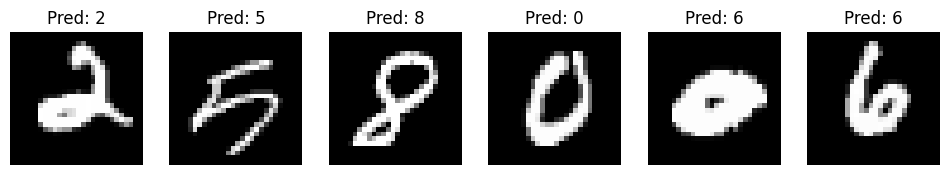

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision # install torchvision==0.20.1
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load MNIST dataset (training data)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Define a simple neural network for image classification
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input size is 28x28 pixels (flattened)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # Output 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop (simplified)
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"Epoch {epoch+1}, Mini-batch {i+1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

# Now make predictions on the first 6 samples in the training set
model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm)
with torch.no_grad():
    # Get the first 6 samples
    images, labels = next(iter(trainloader))
    images = images[:6]
    labels = labels[:6]

    # Make predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Print predictions
    print("\nPredictions for the first 6 samples:")
    for i in range(6):
        print(f"Image {i+1}: True Label: {labels[i].item()}, Predicted: {predicted[i].item()}")

    # Plot the first 6 images with their predicted labels
    fig, axes = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Pred: {predicted[i].item()}")
        ax.axis('off')
    plt.show()
